0.099542106311
escape 0.152 sec.


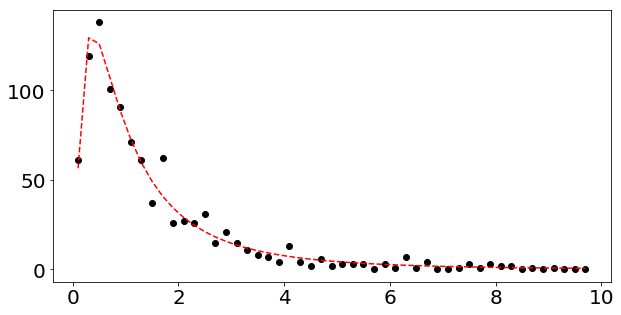

In [4]:
#draw random sample from a generalized PDF
#A. logNormal
#draw random sample from an exponential PDF
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

sig = 1.
mu = 0.

def lognorm(x,mu,sig):
    return 1./(np.sqrt(2*np.pi)*sig*x)*np.exp(-(np.log(x)-mu)**2/(2*sig**2))

start = time.time()
N = 1000
i = 0
k = 0
x = np.zeros((N,1))
while i<N:
    x0 = np.random.uniform(0,10.)
    y0 = np.random.rand()
    y1 = lognorm(x0,mu,sig)
    if y0<=y1:
        x[i] = x0
        i += 1
    k += 1

xgrid = np.arange(0,10,0.2)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
hx,xedge = np.histogram(x,xgrid)

y = lognorm(xcenter,mu,sig)

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(xcenter,hx,'ko')
ax.plot(xcenter,y/np.sum(y)*sum(hx),'r--')
fig.show()

print N/np.float(k)

print('escape %(s).3f sec.' % {'s':time.time()-start})

0.0393716288043


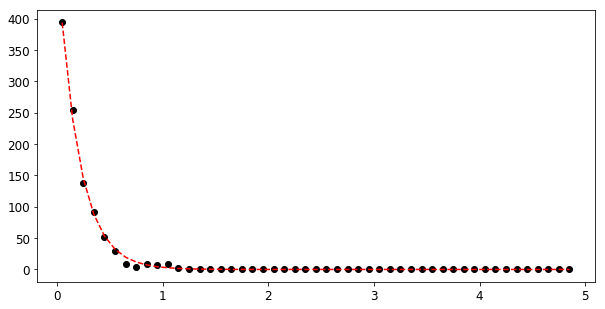

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

#parameter of the exponential density
h = 0.2

#define the density function
def exponential(x,h):
    return 1./h*np.exp(-x/h)

#draw 1000 random samples
N = 1000

#rejection sampling
i = 0
k = 0
x = np.zeros((N,1))
while i<N:
    x0 = np.random.uniform(0,5.)
    y0 = np.random.rand()/h
    y1 = exponential(x0,h)
    if y0<=y1:
        x[i] = x0
        i += 1
    k += 1

# analyze the samples in histogram
xgrid = np.arange(0,5,0.1)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
hx,xedge = np.histogram(x,xgrid)

#calculate the density function analytically
y = exponential(xcenter,h)

#draw histogram and compare with the analytic density curve
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(xcenter,hx,'ko')
ax.plot(xcenter,y/np.sum(y)*sum(hx),'r--')
fig.show()

print N/np.float(k)

0.2032


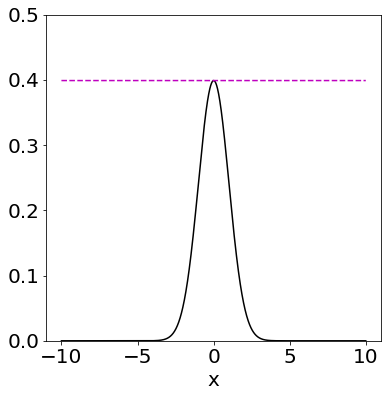

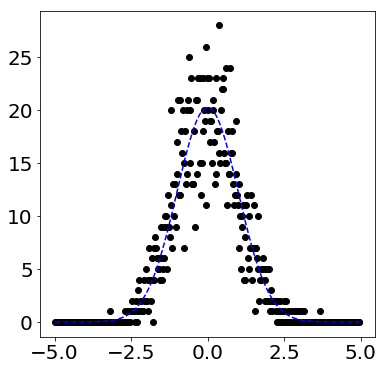

In [46]:
#rejection sampling using a Gaussian as a sample
import numpy as np
import scipy.stats as stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

xgrid = np.arange(-10,10,0.01)
xcenter = (xgrid[1:]+xgrid[0:len(xgrid)-1])/2. 

y = stats.norm.pdf(xcenter,loc=0.,scale=1.)

z_3 = np.repeat(1./(np.sqrt(2*np.pi)*1.),np.shape(y))
z = z_3

N=100000

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xcenter,y,'k-')
ax.plot(xcenter,z,'m--')
ax.set_xlabel('x',fontsize=20)
ax.set_ylim([0,0.5])
fig.show()

N=10000
#step 1: draw random numbers from y3
x_rand1 = np.random.uniform(-5.,5.,size=N)
y_rand1 = np.random.uniform(0.,1./np.sqrt(2*np.pi)+0.1,size=N)
x = x_rand1[y_rand1<=stats.norm.pdf(x_rand1,loc=0.,scale=1.)]


xgrid2 = np.arange(-5.,5.,0.025)
xcenter2 = (xgrid2[1:]+xgrid2[0:len(xgrid2)-1])/2. 
hx2,xedge = np.histogram(x,xgrid2)

y2 = stats.norm.pdf(xcenter2,loc=0.,scale=1.)

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xcenter2,hx2,'ko')
ax.plot(xcenter2,y2/sum(y2)*sum(hx2),'b--')
fig.show()

print len(x)/float(N)

0.26666


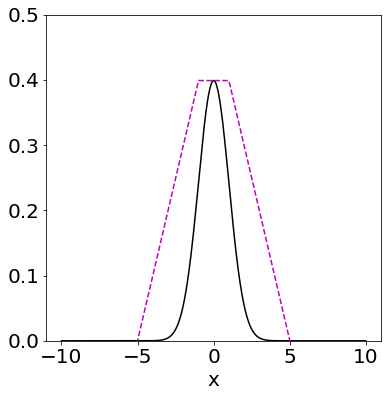

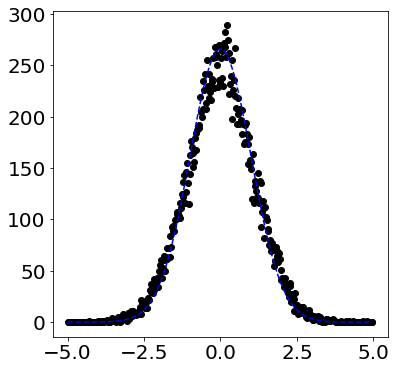

In [42]:
N=100000
xgrid = np.arange(-10,10,0.01)
xcenter = (xgrid[1:]+xgrid[0:len(xgrid)-1])/2. 

y = stats.norm.pdf(xcenter,loc=0.,scale=1.)

#the segments surrounding p(x)
z_1 = (xcenter+5.)/(-1.-(-5.))*(1./(np.sqrt(2*np.pi)*1.)-0.)+0.
#z_2 = (xcenter+2)/(-1-(-2))*(1./(np.sqrt(2*np.pi)*1.)-0.1)+0.1
z_3 = np.repeat(1./(np.sqrt(2*np.pi)*1.),np.shape(y))
#z_4 = (xcenter-2.)/(1.-2)*(1./(np.sqrt(2*np.pi)*1.)-0.1)+0.1
z_5 = (xcenter-5.)/(1.-5.)*(1./(np.sqrt(2*np.pi)*1.)-0.)+0.
z = z_1
#z[(xcenter>-2) & (xcenter<=-1)] = z_2[(xcenter>-2) & (xcenter<=-1)]
z[(xcenter>-1.) & (xcenter<=1.)] = z_3[(xcenter>-1.) & (xcenter<=1.)]
#z[(xcenter>1.) & (xcenter<=2)] = z_4[(xcenter>1.) & (xcenter<=2)]
z[(xcenter>1.)] = z_5[(xcenter>1.)]

#linear interpolation
fz = interp1d(xcenter,z,kind='cubic')
#linear interpolation
fz = interp1d(xcenter,z,kind='cubic')

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xcenter,y,'k-')
ax.plot(xcenter,z,'m--')
ax.set_xlabel('x',fontsize=20)
ax.set_ylim([0,0.5])
fig.show()



x_rand1 = np.random.uniform(-5,5,size=N)
y_rand1 = np.random.uniform(0.,1.,size=N)
y_rand = stats.norm.pdf(x_rand1,loc=0.,scale=1.)
Q = y_rand/fz(x_rand1)
x_rand2 = np.random.uniform(0.,1.,size=np.shape(x_rand1))
x = x_rand1[x_rand2<Q]

xgrid2 = np.arange(-5,5,0.025)
xcenter2 = (xgrid2[1:]+xgrid2[0:len(xgrid2)-1])/2. 
hx2,xedge = np.histogram(x,xgrid2)

y2 = stats.norm.pdf(xcenter2,loc=0.,scale=1.)

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xcenter2,hx2,'ko')
ax.plot(xcenter2,y2/sum(y2)*sum(hx2),'b--')
fig.show()


print len(x)/float(N)